<a href="https://colab.research.google.com/github/amirrhseiin/Voice-Semantic-Detection/blob/main/simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip 'drive/MyDrive/project4-part2/train.zip'
!unzip 'drive/MyDrive/project4-part2/test.zip'

Archive:  drive/MyDrive/project4-part2/train.zip
   creating: train/
  inflating: train/0000MA.wav        
  inflating: train/0003MA.wav        
  inflating: train/0004MN.wav        
  inflating: train/0005FS.wav        
  inflating: train/0006MA.wav        
  inflating: train/0008FN.wav        
  inflating: train/0011MN.wav        
  inflating: train/0012FS.wav        
  inflating: train/0013FH.wav        
  inflating: train/0014FW.wav        
  inflating: train/0015MN.wav        
  inflating: train/0016FS.wav        
  inflating: train/0018MA.wav        
  inflating: train/0020FW.wav        
  inflating: train/0021MN.wav        
  inflating: train/0022MA.wav        
  inflating: train/0023FH.wav        
  inflating: train/0024MA.wav        
  inflating: train/0027MA.wav        
  inflating: train/0028MH.wav        
  inflating: train/0029MA.wav        
  inflating: train/0031MA.wav        
  inflating: train/0032FS.wav        
  inflating: train/0033MN.wav        
  inflating: train/

In [ ]:
from pandas import DataFrame
import glob
import pandas as pd
from sklearn import preprocessing 
import numpy as np
import librosa
import IPython
from IPython.display import Audio
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from keras import Model
from keras.models import load_model
from keras.layers import Dense, Dropout, Input , LSTM
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical, plot_model
from keras.callbacks import  EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
test_label = pd.read_csv('drive/MyDrive/project4-part2/result.csv')

In [ ]:
test_label

,Id,label
0,2705F,N
1,2707M,H
2,2708F,N
3,2710M,A
4,2711M,A
...,...,...
222,2992M,S
223,2993M,N
224,2995M,N
225,2996F,W


In [ ]:
test_class_size = np.sum(pd.get_dummies(test_label.label))
test_class_size

A    72
H    22
N    92
S    27
W    14
dtype: int64

In [ ]:
train_name_list =[]
train_name_list = glob.glob("train/*.wav")

In [ ]:
test_name_list =[]
test_name_list = glob.glob("test/*.wav")

In [ ]:
temp = []

for i in test_name_list:
  temp.append(i[5:10])
temp

['2928F',
 '2948F',
 '2960M',
 '2736M',
 '2953F',
 '2955M',
 '2802M',
 '2920M',
 '2962M',
 '2845M',
 '2932M',
 '2898M',
 '2896F',
 '2787F',
 '2968F',
 '2923M',
 '2744F',
 '2956M',
 '2966F',
 '2957M',
 '2927M',
 '2708F',
 '2922M',
 '2995M',
 '2737F',
 '2825F',
 '2837M',
 '2967M',
 '2926M',
 '2797F',
 '2917F',
 '2738M',
 '2817M',
 '2790F',
 '2965M',
 '2893M',
 '2856M',
 '2854F',
 '2981M',
 '2762M',
 '2745F',
 '2712M',
 '2839F',
 '2888M',
 '2729F',
 '2863M',
 '2985F',
 '2822F',
 '2911F',
 '2871M',
 '2900M',
 '2986M',
 '2933M',
 '2971M',
 '2850M',
 '2858F',
 '2753M',
 '2830F',
 '2814F',
 '2816F',
 '2857F',
 '2823M',
 '2999M',
 '2902F',
 '2929F',
 '2897M',
 '2887F',
 '2946M',
 '2757M',
 '2805F',
 '2877M',
 '2735M',
 '2831M',
 '2860F',
 '2977M',
 '2792M',
 '2983M',
 '2988M',
 '2992M',
 '2915M',
 '2750M',
 '2733M',
 '2710M',
 '2934F',
 '2969M',
 '2987F',
 '2722F',
 '2989M',
 '2939M',
 '2949M',
 '2780M',
 '2961M',
 '2882M',
 '2714M',
 '2901F',
 '2819M',
 '2821M',
 '2895M',
 '2938F',
 '2808M',


In [ ]:
df = DataFrame (temp ,columns=['Name'])
df

,Name
0,2928F
1,2948F
2,2960M
3,2736M
4,2953F
...,...
222,2874M
223,2936M
224,2876F
225,2770F


In [ ]:
len(train_name_list)

1994

In [ ]:
len(test_name_list)

227

In [ ]:
train_label = []
for name in train_name_list:
  train_label.append(name[11:12])

In [ ]:
train_label = pd.get_dummies(train_label)
train_label

,A,H,N,S,W
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1989,1,0,0,0,0
1990,0,0,1,0,0
1991,1,0,0,0,0
1992,0,0,1,0,0


In [ ]:
train_class_size = np.sum(train_label)
train_class_size

A    723
H    130
N    690
S    302
W    149
dtype: int64

In [ ]:
train_label.shape

(1994, 5)

In [ ]:
IPython.display.Audio('train/1458MH.wav')

In [ ]:
def extract_mfcc(file_path):
  y,sr=librosa.load(file_path)
  mfccs=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=36).T,axis=0)
  return mfccs 

In [ ]:
def extract_cens(file_path):
  y,sr=librosa.load(file_path)
  cens =np.mean(librosa.feature.chroma_cens(y=y,sr=sr,n_chroma=36).T,axis=0)
  return cens 

In [ ]:
sound_feature_mfcc=[]
sound_feature_cens=[]
for name in train_name_list:
  sound_feature_mfcc.append(extract_mfcc(name))
  sound_feature_cens.append(extract_cens(name))

In [ ]:
sound_feature_cens[0].shape
len(sound_feature_cens)

1994

In [ ]:
mfcc_extracted_features =[]

for i in range(len(train_name_list)):
  mfcc = sound_feature_mfcc[i]
  feature = np.array([mfcc]).reshape(36,1)
  mfcc_extracted_features.append(feature)

mfcc_extracted_features = np.asarray(mfcc_extracted_features)

In [ ]:
cens_extracted_features =[]

for i in range(len(train_name_list)):
  cens = sound_feature_cens[i]
  feature = np.array([cens]).reshape(36,1)
  cens_extracted_features.append(feature)

cens_extracted_features = np.asarray(cens_extracted_features)

In [ ]:
test_sound_feature_mfcc=[]
test_sound_feature_cens=[]

for name in test_name_list:
  test_sound_feature_mfcc.append(extract_mfcc(name))
  test_sound_feature_cens.append(extract_cens(name))

In [ ]:
test_mfcc_extracted_features =[]

for i in range(len(test_name_list)):
  mfcc = test_sound_feature_mfcc[i]
  feature = np.array([mfcc]).reshape(36,1)
  test_mfcc_extracted_features.append(feature)

test_mfcc_extracted_features = np.asarray(test_mfcc_extracted_features)


In [ ]:
test_cens_extracted_features =[]

for i in range(len(test_name_list)):
  cens = test_sound_feature_cens[i]
  feature = np.array([cens]).reshape(36,1)
  test_cens_extracted_features.append(feature)

test_cens_extracted_features = np.asarray(test_cens_extracted_features)

In [ ]:
input_layer = Input(shape=(36,1) ,name='input')
lstm_layer = LSTM(128 ,return_sequences=False)(input_layer)
hidden_layer1 = Dense(32 ,activation='relu' ,name='layer1')(lstm_layer)
hidden_layer2 = Dense(16 ,activation='relu' ,name='layer2')(hidden_layer1)
dropout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(8 ,activation='relu' ,name='layer3')(dropout_layer)
output_layer = Dense(5 ,activation='softmax' ,name='output')(hidden_layer3)

In [ ]:
model = Model( inputs=input_layer, outputs=output_layer ,name='model')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 36, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
layer1 (Dense)               (None, 32)                4128      
_________________________________________________________________
layer2 (Dense)               (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
layer3 (Dense)               (None, 8)                 136       
_________________________________________________________________
output (Dense)               (None, 5)                 45    

In [ ]:
sgd = SGD(lr=0.0001, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(mfcc_extracted_features ,train_label ,epochs=50 ,batch_size=32 ,verbose=1)

Epoch 1/50
63/63 [==============================] - 5s 37ms/step - loss: 1.6081 - accuracy: 0.2004
Epoch 2/50
63/63 [==============================] - 2s 36ms/step - loss: 1.5923 - accuracy: 0.2583
Epoch 3/50
63/63 [==============================] - 2s 35ms/step - loss: 1.5818 - accuracy: 0.3117
Epoch 4/50
63/63 [==============================] - 2s 36ms/step - loss: 1.5679 - accuracy: 0.3668
Epoch 5/50
63/63 [==============================] - 2s 35ms/step - loss: 1.5624 - accuracy: 0.4046
Epoch 6/50
63/63 [==============================] - 2s 35ms/step - loss: 1.5493 - accuracy: 0.4175
Epoch 7/50
63/63 [==============================] - 2s 36ms/step - loss: 1.5495 - accuracy: 0.4331
Epoch 8/50
63/63 [==============================] - 2s 35ms/step - loss: 1.5460 - accuracy: 0.4259
Epoch 9/50
63/63 [==============================] - 2s 35ms/step - loss: 1.5306 - accuracy: 0.4463
Epoch 10/50
63/63 [==============================] - 2s 35ms/step - loss: 1.5227 - accuracy: 0.4667
Epoch 11/

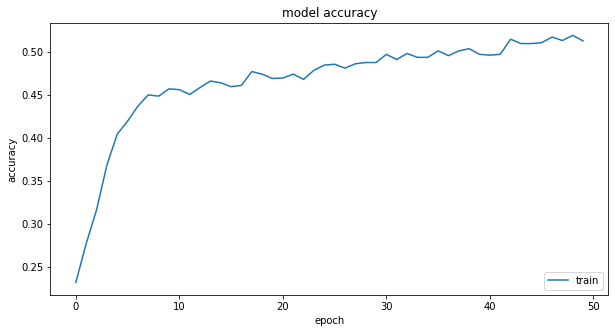

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

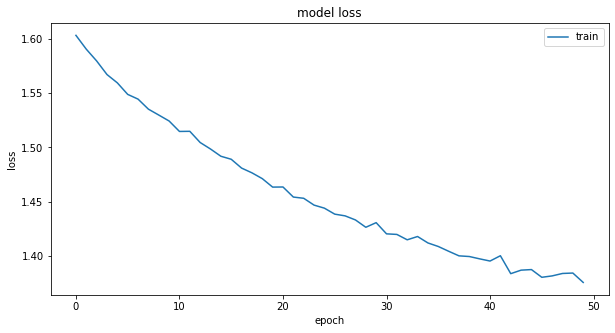

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
predicted = model.predict(test_mfcc_extracted_features)
predicted

array([[0.44465354, 0.07607305, 0.1790107 , 0.20436803, 0.0958946 ],
       [0.2293283 , 0.13846743, 0.32083344, 0.16583288, 0.14553796],
       [0.29981348, 0.1242942 , 0.26347187, 0.17676559, 0.13565479],
       ...,
       [0.49387965, 0.06202699, 0.1533855 , 0.20823088, 0.08247701],
       [0.47915715, 0.06607252, 0.16096503, 0.20735385, 0.08645144],
       [0.19892086, 0.14482585, 0.3387287 , 0.1814279 , 0.13609666]],
      dtype=float32)

In [ ]:
predicted = np.argmax(predicted, axis=1)
predicted 

array([0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2])

In [ ]:
merged_inner = pd.merge(left=test_label, right=df, left_on='Id', right_on='Name')

In [ ]:
label_encoder = preprocessing.LabelEncoder() 

encode_merged_inner = label_encoder.fit_transform(merged_inner.label)

In [ ]:
encode_merged_inner

array([2, 1, 2, 0, 0, 0, 4, 1, 0, 2, 2, 0, 3, 4, 0, 0, 3, 3, 0, 2, 0, 2,
       4, 0, 2, 0, 0, 3, 0, 3, 2, 2, 2, 2, 2, 0, 3, 1, 0, 2, 2, 2, 0, 1,
       2, 2, 0, 0, 3, 2, 2, 2, 3, 2, 0, 2, 2, 0, 1, 0, 3, 3, 0, 0, 2, 3,
       0, 4, 0, 3, 0, 2, 0, 3, 3, 1, 0, 1, 0, 0, 2, 2, 3, 1, 0, 2, 0, 3,
       1, 1, 2, 2, 3, 0, 0, 3, 0, 3, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 4, 2, 0, 2, 1, 2, 2, 1, 0, 4, 2, 2, 0,
       2, 0, 3, 3, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 3, 2, 2, 2, 0, 2,
       1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 4, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 1, 0, 2, 2, 2, 4, 0, 0, 4, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 4,
       4, 1, 2, 2, 2, 2, 0, 3, 2, 0, 0, 2, 2, 0, 0, 2, 4, 2, 2, 4, 2, 0,
       2, 3, 3, 2, 2, 4, 1])

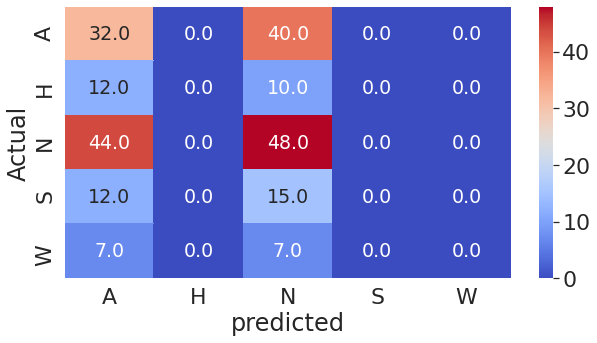

In [ ]:
classes=['A','H','N','S','W']

con_matrix = confusion_matrix( encode_merged_inner, predicted)
df=pd.DataFrame(con_matrix , columns=np.unique(classes), index=np.unique(classes))
df.index.name='Actual'
df.columns.name='predicted'
plt.figure(figsize=(10,5))
sns.set(font_scale=2)
sns.heatmap(df, cmap='coolwarm', annot=True, fmt=".1f", annot_kws={'size':19})


In [ ]:
all_features = []
for i in range(len(train_name_list)):
  features=np.array([mfcc_extracted_features[i],cens_extracted_features[i]]).reshape(36,2)
  all_features.append(features)

all_features = np.asarray(all_features)

In [ ]:
all_features[0].shape

(36, 2)

In [ ]:
test_all_features = []

for i in range(len(test_name_list)):
  features=np.array([test_mfcc_extracted_features[i],test_cens_extracted_features[i]]).reshape(36,2)
  test_all_features.append(features)

test_all_features = np.asarray(test_all_features)

In [ ]:
input_layer = Input(shape=(36,2) ,name='input')
lstm_layer = LSTM(128 ,return_sequences=False)(input_layer)
hidden_layer1 = Dense(32 ,activation='relu' ,name='layer1')(lstm_layer)
hidden_layer2 = Dense(16 ,activation='relu' ,name='layer2')(hidden_layer1)
dropout_layer = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(8 ,activation='relu' ,name='layer3')(dropout_layer)
output_layer = Dense(5 ,activation='softmax' ,name='output')(hidden_layer3)


In [ ]:
model_2 = Model( inputs=input_layer, outputs=output_layer ,name='model_2')
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 36, 2)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               67072     
_________________________________________________________________
layer1 (Dense)               (None, 32)                4128      
_________________________________________________________________
layer2 (Dense)               (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
layer3 (Dense)               (None, 8)                 136       
_________________________________________________________________
output (Dense)               (None, 5)                 45    

In [ ]:
sgd = SGD(lr=0.0001, momentum=0.9)
model_2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_2.fit(all_features ,train_label ,epochs=50 ,batch_size=32 ,verbose=1)

Epoch 1/50
63/63 [==============================] - 4s 31ms/step - loss: 1.6082 - accuracy: 0.2840
Epoch 2/50
63/63 [==============================] - 2s 31ms/step - loss: 1.6029 - accuracy: 0.3835
Epoch 3/50
63/63 [==============================] - 2s 31ms/step - loss: 1.5969 - accuracy: 0.4024
Epoch 4/50
63/63 [==============================] - 2s 31ms/step - loss: 1.5899 - accuracy: 0.4416
Epoch 5/50
63/63 [==============================] - 2s 31ms/step - loss: 1.5831 - accuracy: 0.4561
Epoch 6/50
63/63 [==============================] - 2s 31ms/step - loss: 1.5743 - accuracy: 0.4041
Epoch 7/50
63/63 [==============================] - 2s 31ms/step - loss: 1.5669 - accuracy: 0.3583
Epoch 8/50
63/63 [==============================] - 2s 30ms/step - loss: 1.5603 - accuracy: 0.3558
Epoch 9/50
63/63 [==============================] - 2s 31ms/step - loss: 1.5546 - accuracy: 0.3442
Epoch 10/50
63/63 [==============================] - 2s 31ms/step - loss: 1.5494 - accuracy: 0.3173
Epoch 11/

In [ ]:
model_2.save_weights('project4_weights_3.h5') 
model_2.save('project4_model_3.h5')   

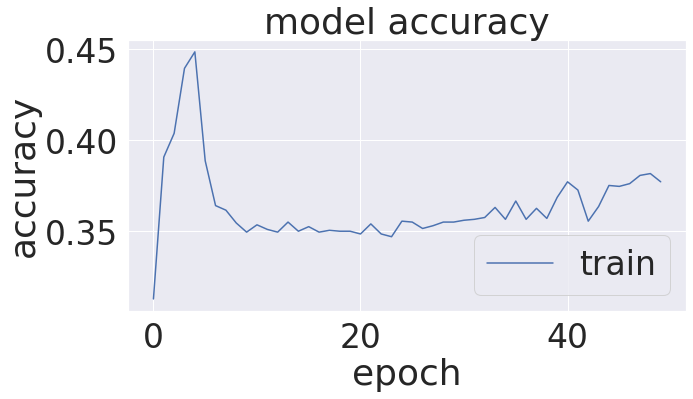

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

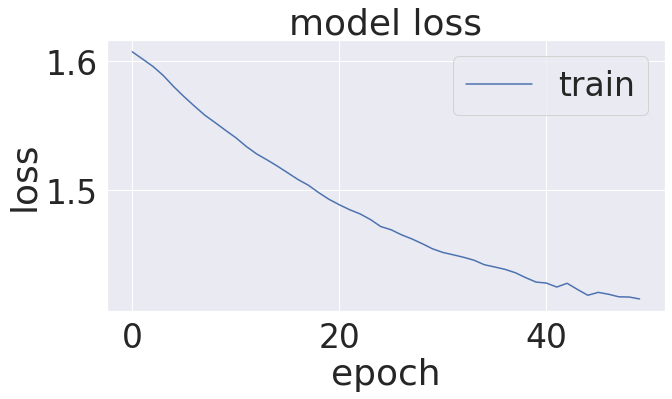

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()